# S2

**Which aspects (accuracy, cleanliness, check-in, or communication) show the greatest differences between the best- and worst-rated accommodations in the overall evaluation?**

In [352]:
# import libraries 
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ks_2samp, skew, kurtosis
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind


## Data Loading

In [354]:
#PATH = 'Data'
#SPRINT = 1
filename = f'data_clean.csv'

In [355]:
def read_file(filename):
    """
    Input: filename (string) - path to the .csv file.
    Function reads .csv data with specific date columns parsed.
    Output: DataFrame or error message.
    """
    try:
        # Reading the file and parsing dates
        df = pd.read_csv(filename, parse_dates=['insert_date', 'first_review_date', 'last_review_date'], dayfirst=True)
        
        # Display first few rows
        display(df.head())
        
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return None


In [356]:
df = read_file(filename)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community,has_reviews
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.000,1.000,...,100.000,0,75.000,spain,malaga,2018-07-31,Málaga,Centro,Andalucía,True
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.000,1.000,...,90.000,0,52.000,spain,madrid,2020-01-10,Madrid,Los Cármenes,Comunidad de Madrid,True
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.000,2.000,...,100.000,1,142.000,spain,sevilla,2019-07-29,Sevilla,San Vicente,Andalucía,True
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.000,1.000,...,90.000,1,306.000,spain,barcelona,2020-01-10,Barcelona,L'Antiga Esquerra de l'Eixample,Cataluña,True
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.000,2.000,...,100.000,0,39.000,spain,girona,2019-02-19,Girona,Quart,Cataluña,True


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 7693 non-null   int64         
 1   name                         7690 non-null   object        
 2   description                  7643 non-null   object        
 3   host_id                      7693 non-null   int64         
 4   neighbourhood_name           7693 non-null   object        
 5   neighbourhood_district       4669 non-null   object        
 6   room_type                    7693 non-null   object        
 7   accommodates                 7693 non-null   int64         
 8   bathrooms                    7652 non-null   float64       
 9   bedrooms                     7654 non-null   float64       
 10  beds                         7685 non-null   float64       
 11  amenities_list               7677 non-null 

## Clean data  

Preparación de datos  
**Filtramos solo alojamientos con reviews completas**

In [359]:
# Remove rows without reviews 
df_filtered=df[df['number_of_reviews'] != 0]

# Checking NaN values 
print(f"Missing values:\n{df_filtered[review_columns].isnull().sum()}")

Missing values:
review_scores_rating           83
review_scores_accuracy         92
review_scores_cleanliness      86
review_scores_checkin          97
review_scores_communication    88
review_scores_location         98
review_scores_value            98
dtype: int64


In [360]:
# Drop rows with NaN values in the selected review columns
df_filtered = df.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 
                             'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location',
                             'review_scores_value'])

# Checking NaN values 
print(f"Missing values:\n{df_filtered[review_columns].isnull().sum()}")

Missing values:
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


In [361]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6039 entries, 0 to 7692
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6039 non-null   int64         
 1   name                         6039 non-null   object        
 2   description                  6015 non-null   object        
 3   host_id                      6039 non-null   int64         
 4   neighbourhood_name           6039 non-null   object        
 5   neighbourhood_district       3901 non-null   object        
 6   room_type                    6039 non-null   object        
 7   accommodates                 6039 non-null   int64         
 8   bathrooms                    6008 non-null   float64       
 9   bedrooms                     6007 non-null   float64       
 10  beds                         6039 non-null   float64       
 11  amenities_list               6031 non-null   obj

In [362]:
print(df_filtered.columns)

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'standardized_city',
       'standardized_neighbourhood', 'autonomous_community', 'has_reviews'],
      dtype='object')


**Seleccionamos los aspectos a comparar**

In [431]:
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
# Aspects to compare (excluding overall rating)
aspects = review_columns[1:]  
print(aspects)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [363]:
print(df_filtered.describe())

       apartment_id       host_id  accommodates  bathrooms  bedrooms     beds  \
count      6039.000      6039.000      6039.000   6008.000  6007.000 6039.000   
mean   15903678.306  65405693.427         4.218      1.540     1.888    2.877   
min       11964.000     10704.000         1.000      0.000     0.000    0.000   
25%     8469419.500  10026212.000         2.000      1.000     1.000    1.000   
50%    17072183.000  41415670.000         4.000      1.000     2.000    2.000   
75%    22622722.000 108896707.000         6.000      2.000     3.000    4.000   
max    32423292.000 336520261.000        29.000     10.000    16.000   30.000   
std     8764155.114  63924308.681         2.505      0.888     1.235    2.233   

         price  minimum_nights  maximum_nights  has_availability  ...  \
count 6039.000        6039.000        6039.000          6039.000  ...   
mean   961.842           4.141         747.786             0.933  ...   
min     80.000           1.000           1.000     

## EDA

### Distribution 

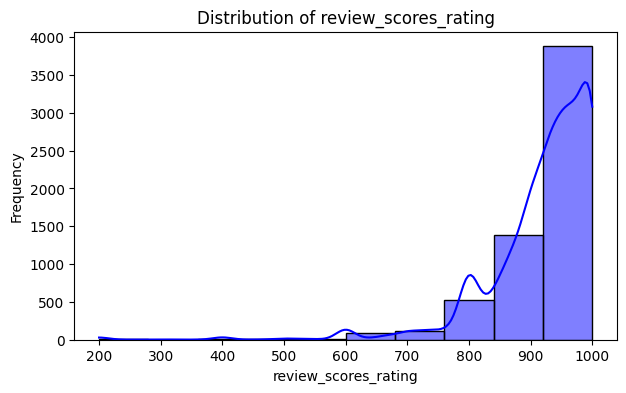

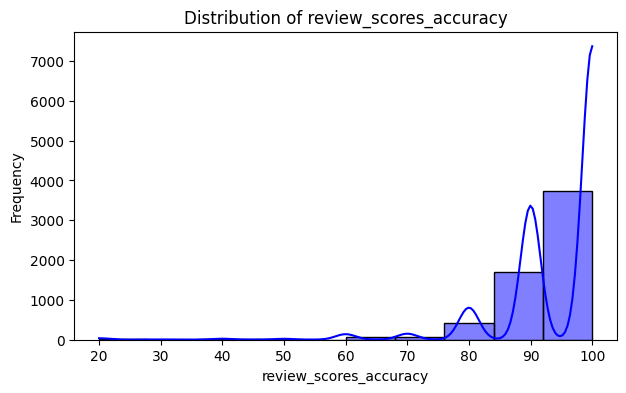

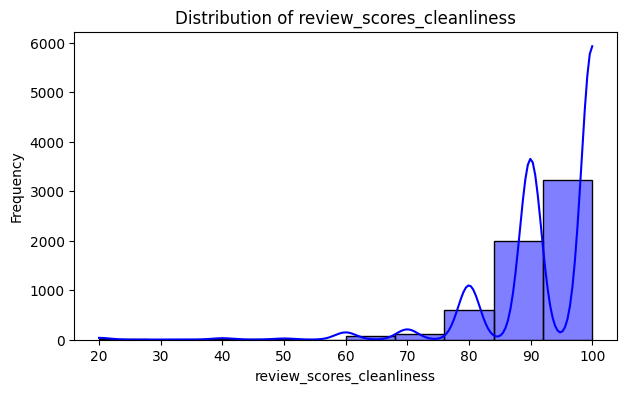

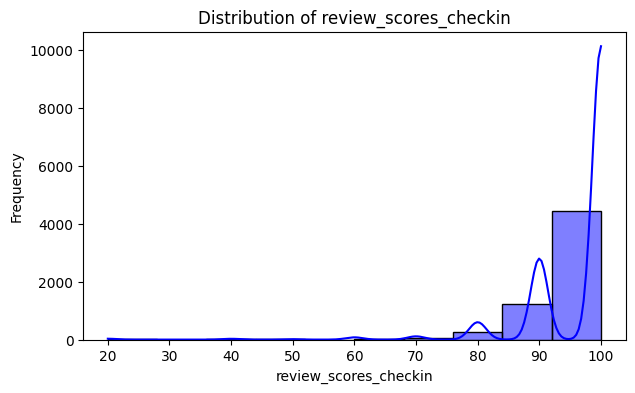

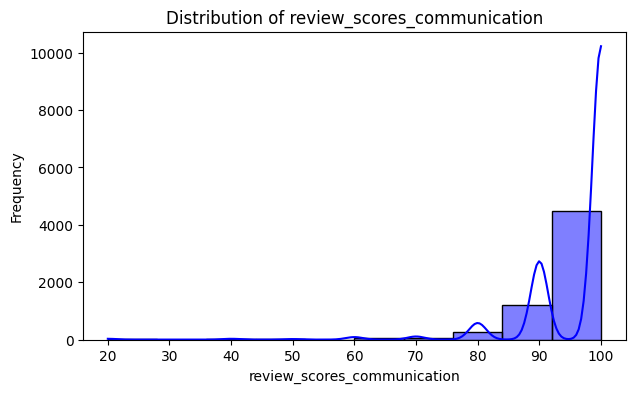

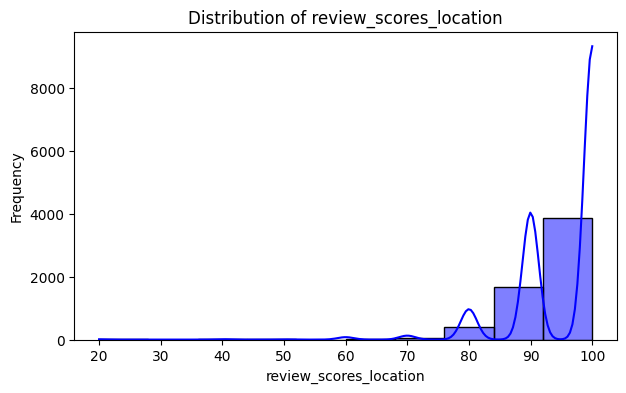

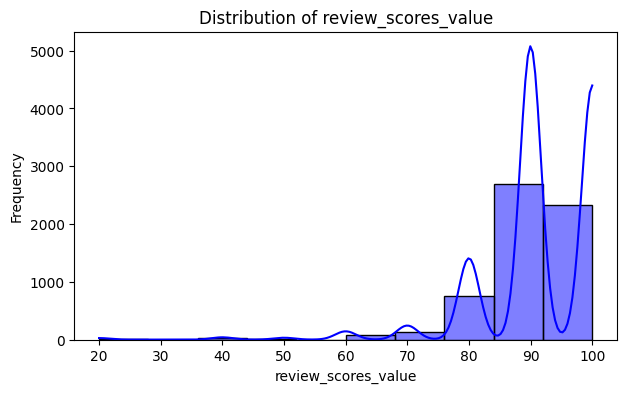

In [450]:
### 1. Distribución de `review_columns` ###
for column in review_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_filtered[column], bins=10, kde=True, color='blue')
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel("Frequency")  # Label for the y-axis
    plt.title(f"Distribution of {column}")  # Title for the plot
    plt.show()

### Normality

In [366]:
# Prueba de normalidad: Kolmogorov-Smirnov
ks_test = ks_2samp(df_filtered['review_scores_rating'], np.random.normal(df_filtered['review_scores_rating'].mean(), df_filtered['review_scores_rating'].std(), size=len(df_filtered)))

# Asimetría y curtosis
skewness = skew(df_filtered['review_scores_rating'])
kurt = kurtosis(df_filtered['review_scores_rating'])

print(f"Kolmogorov-Smirnov p-value: {ks_test.pvalue}")
print(f"Asimetría: {skewness}, Curtosis: {kurt}")

Kolmogorov-Smirnov p-value: 5.764951243689293e-87
Asimetría: -2.77501378446839, Curtosis: 13.705363978338255


**la distribución no es normal**  y debemos usar pruebas no paramétricas para futuros análisis  
**Asimetría = -2.66**  
La distribución es altamente sesgada a la izquierda (hay más valores altos que bajos).  
**Curtosis = 12.81**  
La distribución es leptocúrtica (tiene colas largas y está más concentrada alrededor de ciertos valores).

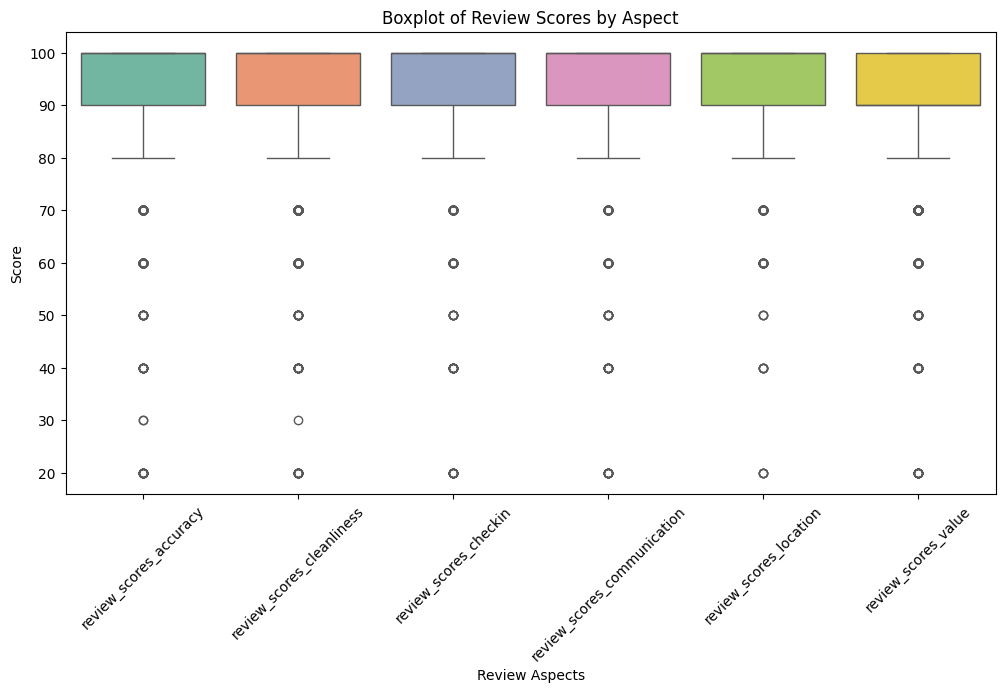

In [435]:
# Melt the DataFrame to have a long format for boxplot
df_melted = df_filtered[aspects].melt(var_name='Aspect', value_name='Score')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aspect', y='Score', data=df_melted, palette='Set2')

# Add labels and title
plt.xlabel("Review Aspects")
plt.ylabel("Score")
plt.title("Boxplot of Review Scores by Aspect")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


## Analysis

Analysis Steps:
1. Divide the data into two groups: the best and worst accommodations based on review_scores_rating.
 - Created quintiles (Q1-Q5) based on overall rating distribution
 - Selected extreme groups: Q5 (top 20%) vs Q1 (bottom 20%)

2. Statistical Comparison For each aspect (accuracy, cleanliness, etc.):
 - Used Mann-Whitney U test (non-parametric)
 - Calculated Cliff's Delta effect size
 - Calculate the average values of different review aspects for both groups.
    - Compute the difference between the mean values of each metric.
    - Identify the aspects with the largest discrepancies between the two groups.

### 1. Clasificación en Rangos (Quintiles)

Quintile boundaries (based on review_scores_rating):
Quintile 1: 200.00
Quintile 2: 870.00
Quintile 3: 922.00
Quintile 4: 960.00
Quintile 5: 990.00
Quintile 6: 1000.00

Distribution across quintiles:
rating_quintil
Q3    1544
Q1    1260
Q2    1156
Q5    1072
Q4    1007
Name: count, dtype: int64


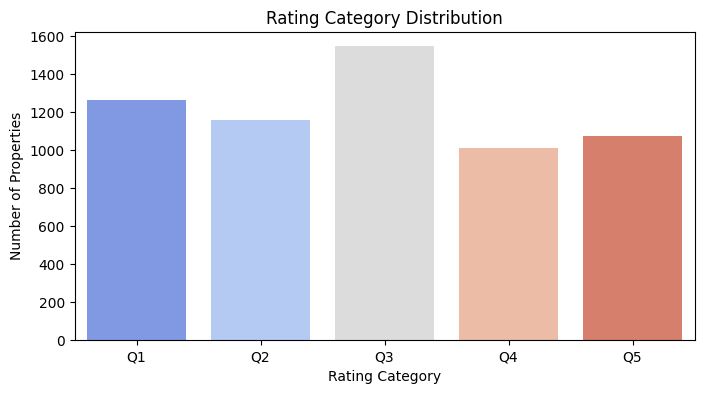

In [370]:
# Calculate quintile groups for the 'review_scores_rating' column
quintile_bins = df_filtered['review_scores_rating'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).to_dict()
df_filtered['rating_quintil'] = pd.qcut(df_filtered['review_scores_rating'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_filtered.to_csv('df_filtered.csv')

# Print the quintile boundaries
print("Quintile boundaries (based on review_scores_rating):")
for i, (quantile, value) in enumerate(quintile_bins.items()):
    print(f"Quintile {i+1}: {value:.2f}")

# Show the number of elements in each quintile
print("\nDistribution across quintiles:")
print(df_filtered['rating_quintil'].value_counts())

# Visualization of the classification
plt.figure(figsize=(8, 4))
sns.countplot(x=df_filtered['rating_quintil'], palette="coolwarm")
plt.xlabel("Rating Category")
plt.ylabel("Number of Properties")
plt.title("Rating Category Distribution")
plt.show()



Clasificación por Quintiles
Los 5 grupos tienen una distribución desigual:
Q3 (1415 propiedades) es el grupo más grande
Q5 (921 propiedades) es el más pequeño
Parece haber una concentración de valores en los rangos intermedios

In [437]:
best_rated = df_filtered[df_filtered['rating_quintil'] == 'Q5']
worst_rated = df_filtered[df_filtered['rating_quintil'] == 'Q1']

print(f"Best_rated size: {len(best_rated)}")
print(f"Worst_rated size: {len(worst_rated)}")

Best_rated size: 1072
Worst_rated size: 1260


In [372]:
best_rated['review_scores_rating'].value_counts()

review_scores_rating
1000.000    1072
Name: count, dtype: int64

In [373]:
worst_rated['review_scores_rating'].value_counts().sort_values()

review_scores_rating
300.000      1
660.000      1
630.000      1
470.000      1
550.000      2
680.000      3
530.000      3
690.000      3
640.000      4
650.000      4
740.000      5
500.000      6
710.000      6
760.000     10
720.000     11
790.000     11
200.000     13
400.000     14
670.000     18
770.000     18
750.000     25
780.000     26
730.000     27
810.000     28
700.000     33
820.000     38
830.000     61
600.000     63
840.000     78
860.000    100
850.000    120
870.000    189
800.000    337
Name: count, dtype: int64

### 2. Statistical test 

In [439]:
def compare_aspects_by_rating(df, quintile_col='rating_quintil'):
    """
    Compare review aspects between top-rated (Q5) and bottom-rated (Q1) accommodations
    with comprehensive missing data handling and statistical testing.
    """
    
    results = []
    
    for aspect in aspects:
        # Extract scores
        top_scores = best_rated[aspect]
        bottom_scores = worst_rated[aspect]
        
        # Skip if insufficient data
        if len(top_scores) < 3 or len(bottom_scores) < 3:
            print(f"Skipping {aspect.replace('review_scores_', '')}: insufficient data "
                  f"(Top n={len(top_scores)}, Bottom n={len(bottom_scores)})")
            continue
            
        # Default to non-parametric test
        test_used = 'Mann-Whitney U'
        stat, p = mannwhitneyu(top_scores, bottom_scores, alternative='two-sided')
        effect_size = (2*stat/(len(top_scores)*len(bottom_scores))) - 1  # Cliff's delta
        
        # Only attempt normality check if sufficient data (Shapiro works best with 3-50 samples)
        if len(top_scores) >= 20 and len(bottom_scores) >= 20:
            _, top_p = stats.shapiro(top_scores)
            _, bottom_p = stats.shapiro(bottom_scores)
            
            if top_p > 0.05 and bottom_p > 0.05:
                # Use parametric test if both groups normal
                stat, p = ttest_ind(top_scores, bottom_scores, equal_var=False)
                test_used = "Welch's t-test"
                effect_size = (top_scores.mean() - bottom_scores.mean()) / np.sqrt(
                    (top_scores.std()**2 + bottom_scores.std()**2)/2)  # Cohen's d
        
        results.append({
            'Aspect': aspect.replace('review_scores_', ''),
            'Top_Mean': top_scores.mean(),
            'Bottom_Mean': bottom_scores.mean(),
            'Mean_Difference': top_scores.mean() - bottom_scores.mean(),
            'Effect_Size': effect_size,
            'p_value': p,
            'Test_Used': test_used,
            'Top_n': len(top_scores),
            'Bottom_n': len(bottom_scores)
        })
    
    if not results:
        raise ValueError("No aspects could be analyzed - insufficient data in all cases")
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    # Multiple testing correction
    pvals = results_df['p_value']
    _, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
    results_df['p_value_adj'] = pvals_corrected
    results_df['Significant'] = pvals_corrected < 0.05
    
    return results_df.sort_values('Effect_Size', ascending=False)

# Execute the analysis
try:
    analysis_results = compare_aspects_by_rating(df_filtered)
    
    # Display formatted results
    pd.set_option('display.float_format', '{:.3f}'.format)
    print("="*80)
    print("STATISTICAL COMPARISON OF REVIEW ASPECTS")
    print(f"Top Rated (Q5) vs Bottom Rated (Q1) Accommodations")
    print("="*80)
    print(analysis_results[['Aspect', 'Top_Mean', 'Bottom_Mean', 'Mean_Difference', 
                          'Effect_Size', 'p_value_adj', 'Significant', 'Test_Used',
                          'Top_n', 'Bottom_n']])
    
except ValueError as e:
    print(f"Analysis Error: {e}")

STATISTICAL COMPARISON OF REVIEW ASPECTS
Top Rated (Q5) vs Bottom Rated (Q1) Accommodations
          Aspect  Top_Mean  Bottom_Mean  Mean_Difference  Effect_Size  \
5          value    96.838       80.746           16.092        0.783   
0       accuracy    98.554       84.635           13.919        0.756   
1    cleanliness    97.752       83.079           14.673        0.732   
3  communication    98.909       89.024            9.885        0.598   
2        checkin    98.582       89.286            9.296        0.575   
4       location    97.099       90.849            6.250        0.396   

   p_value_adj  Significant       Test_Used  Top_n  Bottom_n  
5        0.000         True  Mann-Whitney U   1072      1260  
0        0.000         True  Mann-Whitney U   1072      1260  
1        0.000         True  Mann-Whitney U   1072      1260  
3        0.000         True  Mann-Whitney U   1072      1260  
2        0.000         True  Mann-Whitney U   1072      1260  
4        0.000    

### 3. Visualization

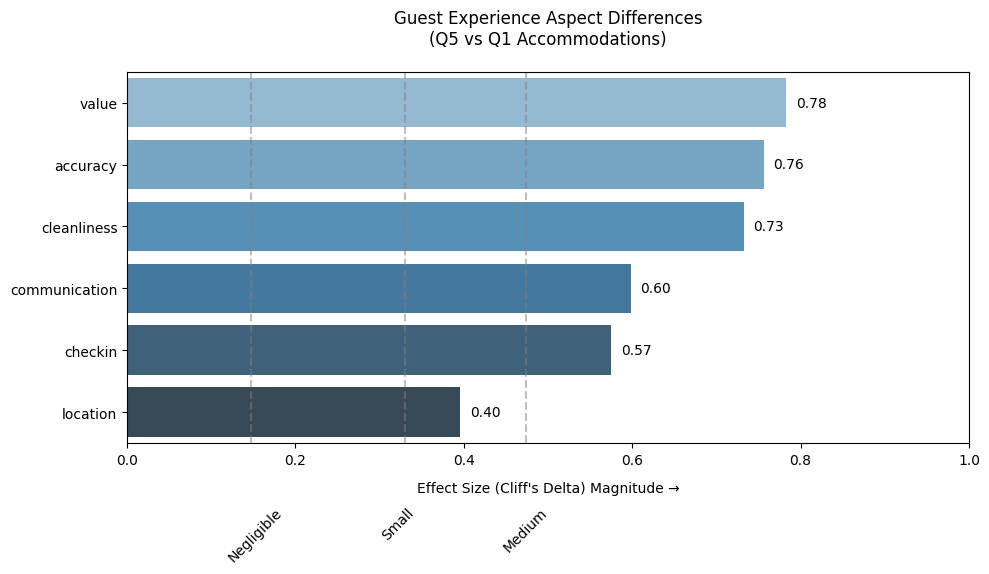

In [508]:
plt.figure(figsize=(10,6))
blue_palette = sns.color_palette("Blues_d", n_colors=6)
ax = sns.barplot(
    data=analysis_results, 
    x='Effect_Size', 
    y='Aspect',
    palette=blue_palette
)
# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", 
                (p.get_width() + 0.03, p.get_y() + 0.4),
                ha='center', va='center')
    
# Add interpretation lines
for threshold, label in [(0.147, "Negligible"), 
                         (0.33, "Small"), 
                         (0.474, "Medium")]:
    plt.axvline(threshold, color='gray', linestyle='--', alpha=0.5)
    plt.text(threshold-0.03, 6.5, label, rotation=45, va='top')

plt.title("Guest Experience Aspect Differences\n(Q5 vs Q1 Accommodations)", pad=20)
plt.xlabel("Effect Size (Cliff\'s Delta) Magnitude →", labelpad=10)
plt.ylabel("")
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig('effect_sizes.png', dpi=300, bbox_inches='tight')

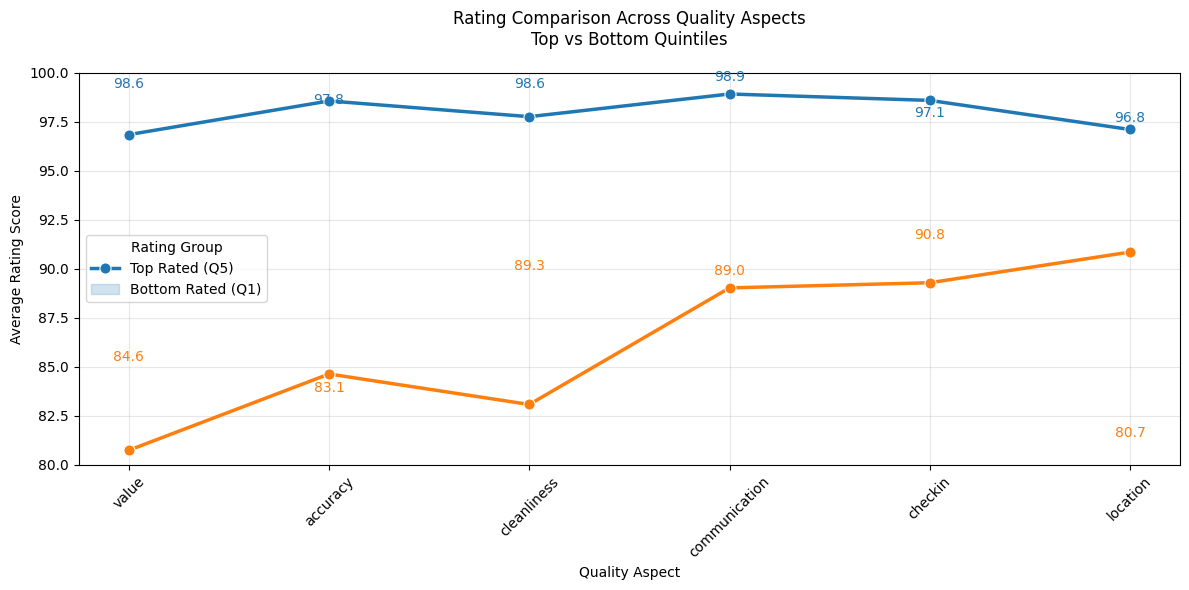

In [522]:
plt.figure(figsize=(12, 6))

# Prepare data - melt the dataframe for plotting
plot_data = analysis_results.melt(id_vars=['Aspect'], 
                                 value_vars=['Top_Mean', 'Bottom_Mean'],
                                 var_name='Group', 
                                 value_name='Score')

# Create parallel coordinates plot
sns.lineplot(data=plot_data,
             x='Aspect',
             y='Score',
             hue='Group',
             palette=['#1f77b4', '#ff7f0e'],  # Blue for top, orange for bottom
             marker='o',
             linewidth=2.5,
             markersize=8,
             sort=False)  # Maintain original aspect order

# Customize plot
plt.title('Rating Comparison Across Quality Aspects\nTop vs Bottom Quintiles', pad=20)
plt.xlabel('Quality Aspect')
plt.ylabel('Average Rating Score')
plt.ylim(80, 100)  # Set consistent y-axis range
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title='Rating Group', 
           labels=['Top Rated (Q5)', 'Bottom Rated (Q1)'])

# Add value annotations
for group in ['Top_Mean', 'Bottom_Mean']:
    for i, row in analysis_results.iterrows():
        plt.text(i, row[group]+0.5, f"{row[group]:.1f}", 
                 ha='center', va='bottom',
                 color='#1f77b4' if group == 'Top_Mean' else '#ff7f0e')

plt.tight_layout()
plt.show()

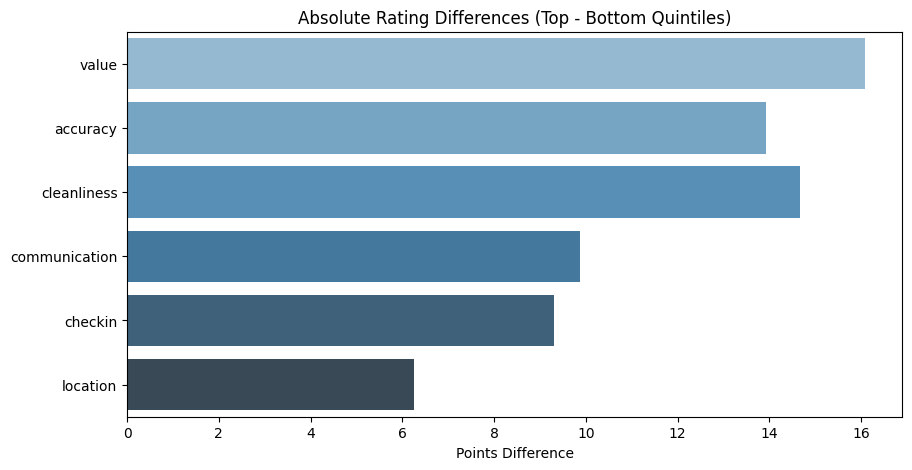

In [516]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=analysis_results,
    x='Mean_Difference', y='Aspect',
    palette=blue_palette,
    dodge=False
)
plt.title("Absolute Rating Differences (Top - Bottom Quintiles)")
plt.xlabel("Points Difference")
plt.ylabel("")
plt.legend().remove()

In [518]:
display_cols = ['Aspect', 'Mean_Difference', 'Effect_Size', 'Significant']
summary_table = analysis_results[display_cols].copy()
summary_table['Impact'] = pd.cut(
    summary_table['Effect_Size'],
    bins=[0, 0.33, 0.474, 1],
    labels=['Moderate', 'High', 'Very High']
)

summary_table.style\
    .background_gradient(subset=['Effect_Size'], cmap='Blues')\
    .format({'Mean_Difference': '{:.1f} pts', 'Effect_Size': '{:.2f}'})

,Aspect,Mean_Difference,Effect_Size,Significant,Impact
5,value,16.1 pts,0.78,True,Very High
0,accuracy,13.9 pts,0.76,True,Very High
1,cleanliness,14.7 pts,0.73,True,Very High
3,communication,9.9 pts,0.60,True,Very High
2,checkin,9.3 pts,0.57,True,Very High
4,location,6.2 pts,0.40,True,High


#### Violinplot

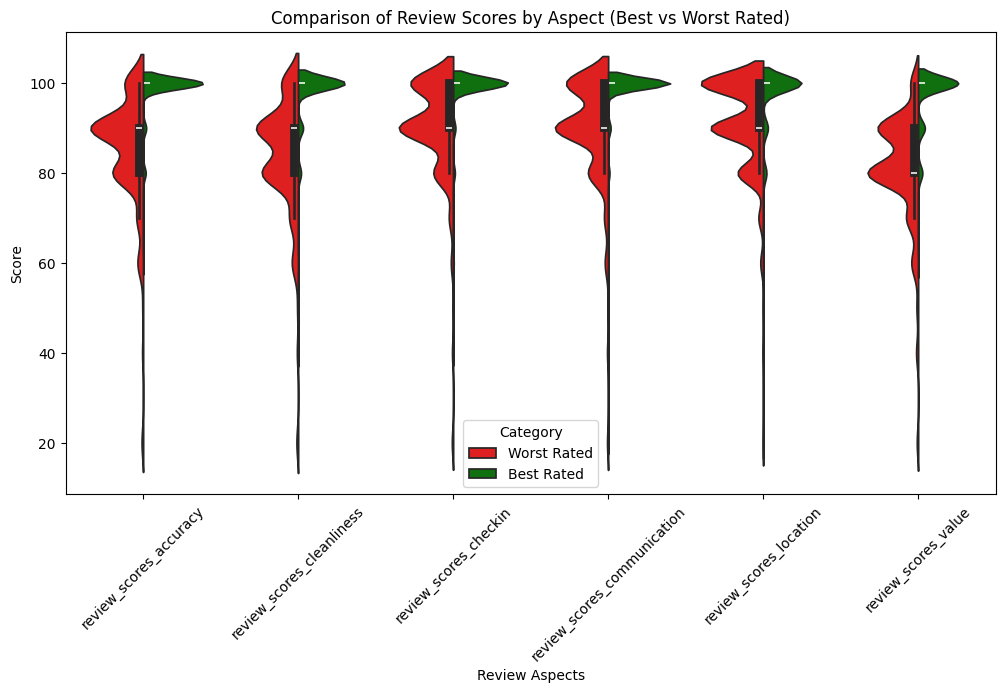

In [445]:
# Add a category column to both datasets
worst_rated["Category"] = "Worst Rated"
best_rated["Category"] = "Best Rated"

# Concatenate both datasets
df_combined = pd.concat([worst_rated, best_rated])

# Melt the DataFrame to long format
df_melted = df_combined.melt(id_vars=["Category"], value_vars=aspects, var_name="Aspect", value_name="Score")

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Aspect", y="Score", hue="Category", data=df_melted, split=True, palette=["red", "green"])

# Customize the plot
plt.xlabel("Review Aspects")
plt.ylabel("Score")
plt.title("Comparison of Review Scores by Aspect (Best vs Worst Rated)")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


#### Heatmap

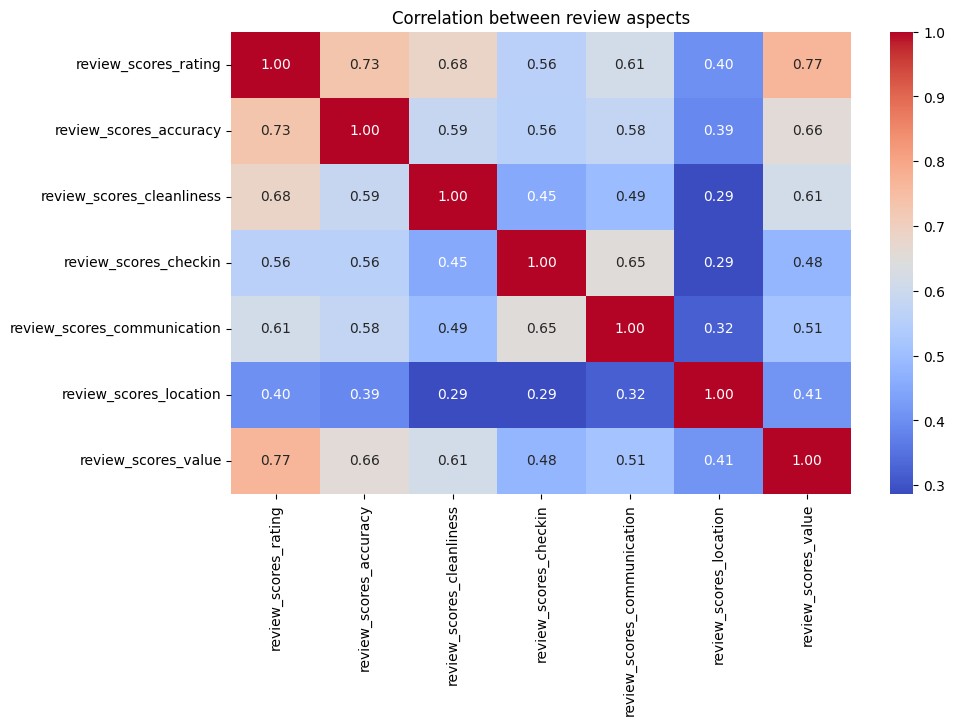

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.732
Model:                              OLS   Adj. R-squared:                  0.732
Method:                   Least Squares   F-statistic:                     2749.
Date:                  Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                          23:34:30   Log-Likelihood:                -31651.
No. Observations:                  6039   AIC:                         6.332e+04
Df Residuals:                      6032   BIC:                         6.336e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [385]:

# Selecting only numerical columns related to review scores
review_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[review_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between review aspects")
plt.show()

# Linear regression: predicting overall rating
X = df_filtered[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value']]
X = sm.add_constant(X)  # Adding a constant term for the model
y = df_filtered['review_scores_rating'].dropna()  # Target variable

model = sm.OLS(y, X.loc[y.index]).fit()
print(model.summary())


